### NLTK

In [ ]:
# import os
# import PyPDF2

# # Get the directory path of the current script
# script_dir = os.getcwd()

# # Define the input and output folder paths relative to the script's location
# input_folder = os.path.join(script_dir, 'Minutes')
# output_folder = os.path.join(script_dir, 'Text_Files')

# # Create the output folder if it doesn't exist
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # List all files in the input folder
# file_names = os.listdir(input_folder)

# # Iterate through each file in the input folder
# for file_name in file_names:
#     # Check if the file is a PDF file
#     if file_name.endswith('.pdf'):
#         # Open the PDF file
#         with open(os.path.join(input_folder, file_name), 'rb') as pdf_file:
#             # Create a PDF reader object
#             pdf_reader = PyPDF2.PdfReader(pdf_file)
            
#             # Extract text from each page
#             text = ''
#             for page_num in range(len(pdf_reader.pages)):
#                 text += pdf_reader.pages[page_num].extract_text()

#         # Define the output file path
#         output_file_path = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.txt')
        
#         # Write the extracted text to a text file
#         with open(output_file_path, 'w', encoding='utf-8') as txt_file:
#             txt_file.write(text)

# print("PDF files converted to text and saved in", output_folder)


In [8]:
%%capture
!pip install nltk

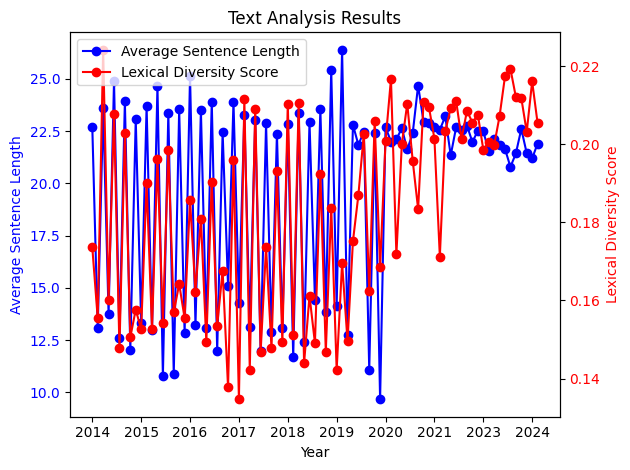

In [3]:
import matplotlib.pyplot as plt
import os
from collections import Counter

# Function to calculate average sentence length
def calculate_average_sentence_length(text):
  # Split text into sentences
  sentences = text.split(".")  # Modify punctuation for sentence splitting if needed

  # Check if there are any sentences
  if len(sentences) == 0:
    return 0  # Handle empty files or no sentences

  # Calculate average sentence length
  total_words = sum(len(sentence.split()) for sentence in sentences)
  average_length = total_words / len(sentences)
  return average_length

# Function to calculate lexical diversity score
def calculate_lexical_diversity(text):
  # Lowercase all words
  words = [word.lower() for word in text.split() if word.isalpha()]

  # Count word occurrences
  word_counts = Counter(words)

  # Calculate total number of words
  num_words = sum(word_counts.values())

  # Calculate number of unique words (vocabulary size)
  num_vocab = len(word_counts)

  # Avoid division by zero (empty text or no words)
  if num_words == 0:
    return 0

  # Calculate lexical diversity score (average vocabulary per word)
  lexical_diversity = num_vocab / num_words
  return lexical_diversity

# Data storage (replace with actual data collection)
filenames = []
average_sentence_lengths = []
lexical_diversity_scores = []

# Replace "Text_Files" with the actual path to your folder
folder_path = "Text_Files"

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
  if filename.endswith(".txt"):  # Check for .txt files only (optional)
    try:
      # Open the file with encoding (e.g., utf-8)
      with open(os.path.join(folder_path, filename), 'r', encoding="utf-8") as file:
        text = file.read()

      # Calculate metrics
      average_sentence_length = calculate_average_sentence_length(text)
      lexical_diversity_score = calculate_lexical_diversity(text)

      # Store data
      filenames.append(filename)
      average_sentence_lengths.append(average_sentence_length)
      lexical_diversity_scores.append(lexical_diversity_score)
    except UnicodeDecodeError:
      # Handle encoding errors (optional, logging or skipping)
      print(f"Error decoding {filename}. Skipping...")

# Create the plot
fig, ax1 = plt.subplots()

# Plot average sentence length on the left y-axis
ax1.plot(filenames, average_sentence_lengths, 'b-o', label='Average Sentence Length')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sentence Length', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set the secondary y-axis for lexical diversity score
ax2 = ax1.twinx()

# Plot lexical diversity score on the right y-axis
ax2.plot(filenames, lexical_diversity_scores, 'r-o', label='Lexical Diversity Score')
ax2.set_ylabel('Lexical Diversity Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legend
plt.title('Text Analysis Results')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Customize x-axis labels
x_labels = [filename[11:15] for i, filename in enumerate(filenames) if i % 9 == 0]  # Extracting year from filename
plt.xticks(range(0, len(filenames), 9), x_labels, rotation=45)

plt.tight_layout()

# Display the plot
plt.show()


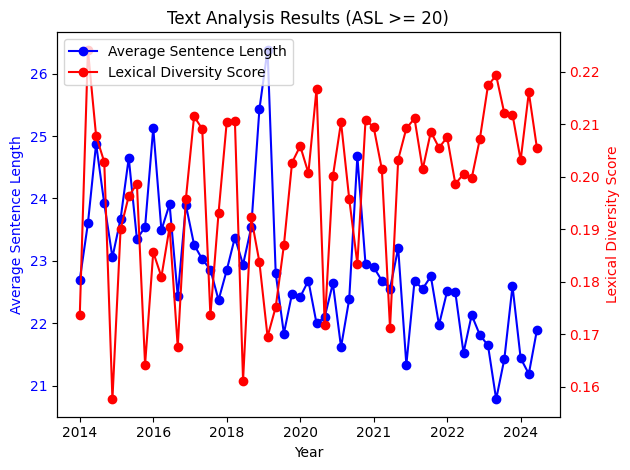

In [4]:
# Filter data based on average sentence length (modify threshold as needed)
filtered_filenames = [filename for filename, asl in zip(filenames, average_sentence_lengths) if asl >= 20]
filtered_average_sentence_lengths = [asl for asl in average_sentence_lengths if asl >= 20]
filtered_lexical_diversity_scores = [lds for lds, asl in zip(lexical_diversity_scores, average_sentence_lengths) if asl >= 20]  # Use zip for corresponding data

# Create the plot
fig, ax1 = plt.subplots()

# Plot average sentence length on the left y-axis
ax1.plot(filtered_filenames, filtered_average_sentence_lengths, 'b-o', label='Average Sentence Length')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sentence Length', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set the secondary y-axis for lexical diversity score
ax2 = ax1.twinx()

# Plot lexical diversity score on the right y-axis
ax2.plot(filtered_filenames, filtered_lexical_diversity_scores, 'r-o', label='Lexical Diversity Score')
ax2.set_ylabel('Lexical Diversity Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legend
plt.title('Text Analysis Results (ASL >= 20)')  # Update title
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Customize x-axis labels
x_labels = [filename[11:15] for i, filename in enumerate(filtered_filenames) if i % 9 == 0]  # Extracting year from filename
plt.xticks(range(0, len(filtered_filenames), 9), x_labels, rotation=45)

plt.tight_layout()  
plt.show()


In [1]:
import os
import nltk
from gensim import corpora, models
from collections import defaultdict


nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stopwords]

# Function to group words by topics using LDA
def group_by_topic(text, num_topics=5):
    tokens = preprocess(text)
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    
    topics = lda_model.show_topics(formatted=False)
    grouped_words = defaultdict(list)
    for topic in topics:
        for word, _ in topic[1]:
            grouped_words[topic[0]].append(word)
    
    return grouped_words

# Directory containing text files
directory = 'Text_Files'

# Process each file in the directory
all_grouped_words = {}
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()
            grouped_words = group_by_topic(text)
            all_grouped_words[filename] = grouped_words

# Final result can be seen in the bottom graph

''' 
for filename, grouped_words in all_grouped_words.items():
    print(f"File: {filename}")
    for topic, words in grouped_words.items():
        print(f"Topic {topic}: {words}")
    print("\n")
'''

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


File: fomcminutes20140129.txt
Topic 0: ['committee', 'foreign', 'federal', 'market', 'bank', 'economic', 'policy', 'inflation', 'reserve', 'rate']
Topic 1: ['committee', 'market', 'federal', 'foreign', 'bank', 'open', 'inflation', 'rate', 'reserve', 'policy']
Topic 2: ['committee', 'federal', 'market', 'foreign', 'inflation', 'bank', 'open', 'reserve', 'rate', 'securities']
Topic 3: ['committee', 'market', 'federal', 'foreign', 'open', 'currency', 'policy', 'operations', 'inflation', 'securities']
Topic 4: ['committee', 'federal', 'market', 'open', 'rate', 'bank', 'currency', 'economic', 'inflation', 'foreign']


File: fomcminutes20140319.txt
Topic 0: ['rate', 'committee', 'participants', 'federal', 'inflation', 'percent', 'economic', 'would', 'market', 'policy']
Topic 1: ['committee', 'rate', 'federal', 'participants', 'inflation', 'economic', 'would', 'policy', 'percent', 'market']
Topic 2: ['rate', 'participants', 'committee', 'inflation', 'market', 'percent', 'policy', 'federal', '

In [6]:
# Changed passes and number of topics in hopes that it wouldn't explode my laptop
def group_by_topic(text, num_topics=20):
    tokens = preprocess(text)
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30)
    
    topics = lda_model.show_topics(formatted=False)
    grouped_words = defaultdict(list)
    for topic in topics:
        for word, _ in topic[1]:
            grouped_words[topic[0]].append(word)
    
    return grouped_words

directory = 'Text_Files'

all_grouped_words = {}
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()
            grouped_words = group_by_topic(text)
            all_grouped_words[filename] = grouped_words

# Leaving as a comment as the result is 1760 different lists
"""""
for topic_idx in range(num_topics):
    print(f"Topic {topic_idx}:")
    for filename, grouped_words in grouped_words_over_time.items():
        print(f"File: {filename[:-4]}")
        print(grouped_words[topic_idx])
        print()
"""


No topics found.


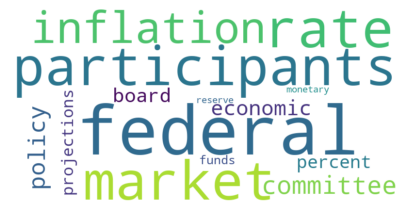

In [15]:
# Combining all text files into a single text
combined_text = ''
directory = 'Text_Files'

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            combined_text += file.read() + ' '

# Process the combined text using your existing group_by_topic function
grouped_words = group_by_topic(combined_text)

# Flatten grouped words to prepare for word cloud
all_topic_words = [word for words in grouped_words.values() for word in words]

# word cloooud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_topic_words))
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
